In [8]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np

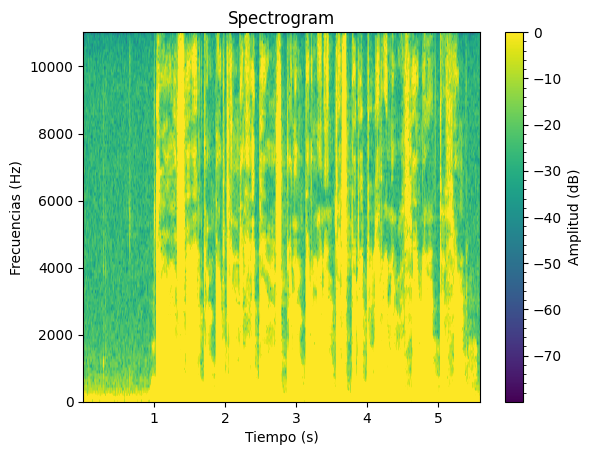

In [20]:
def specgram2d(y, srate=44100, ax=None, title="Spectrogram"):
    if not ax:
        ax = plt.axes()
        ax.set_title(title, loc='center', wrap=True)
        spec, freqs, t, im = ax.specgram(y, Fs=srate, scale='dB', vmax=0)
        ax.set_xlabel('Tiempo (s)')
        ax.set_ylabel('Frecuencias (Hz)')
        cbar = plt.colorbar(im, ax=ax)
        cbar.set_label('Amplitud (dB)')
        cbar.minorticks_on()
        return spec, freqs, t, im
    
#Call the function with the read wav file
srate, y = wavfile.read("C:\\Users\\sanso\\Documents\\Uni\\4t\\TFG\\sanso_dataset\\joined_audio20230621-200631\\wavs\\1.wav")
specgram2d(y, srate)
pass